In [14]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

In [15]:
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

square = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]
]).T

In [16]:
num_frames = 30
angles = np.linspace(0, 2 * np.pi, num_frames)
scales = np.linspace(1, 2, num_frames)
translations = np.linspace(0, 2, num_frames)

In [17]:
filenames = []
for i in range(num_frames):
    t = angles[i]
    s = scales[i]
    tx = translations[i]
    ty = translations[i]

    scale_matrix = np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])

    rotation_matrix = np.array([
        [np.cos(t), -np.sin(t), 0],
        [np.sin(t), np.cos(t), 0],
        [0, 0, 1]
    ])

    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

    transform = translation_matrix @ rotation_matrix @ scale_matrix
    transformed_square = transform @ square

    plt.figure()
    plt.plot(transformed_square[0], transformed_square[1], 'o-')
    plt.xlim(-3, 5)
    plt.ylim(-3, 5)
    plt.title(f"Frame {i+1}")
    filename = os.path.join(output_dir, f"frame_{i:03d}.png")
    plt.savefig(filename)
    plt.close()
    filenames.append(filename)


In [18]:
gif_path = "animated_transformation.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

print(f"GIF guardado como: {gif_path}")

GIF guardado como: animated_transformation.gif


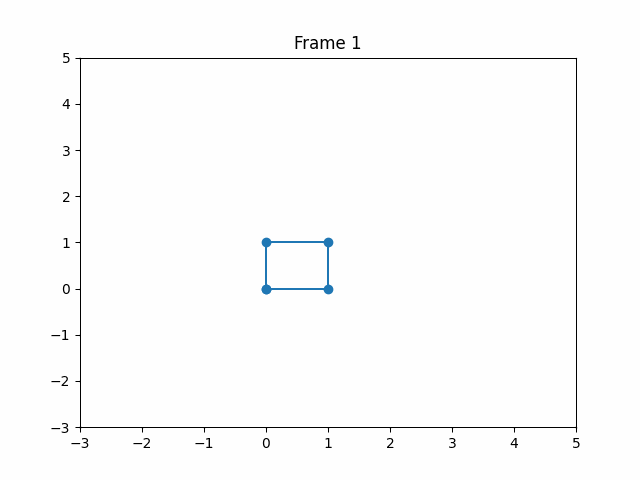

In [19]:
from IPython.display import Image
Image(open('animated_transformation.gif','rb').read())